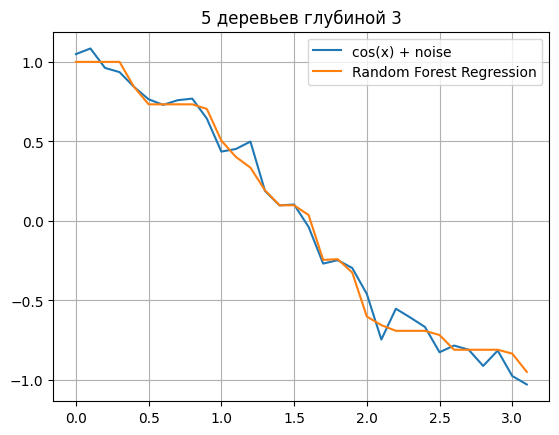

In [5]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, np.pi, 0.1)
n_samples = len(x)
y = np.cos(x) + np.random.normal(0.0, 0.1, n_samples)
x = x.reshape(-1, 1)

n_trees = 5 # количество деревьев
n_depth = 3 # глубина

clf = RandomForestRegressor(max_depth = n_depth, n_estimators = n_trees)
clf.fit(x, y)
yy = clf.predict(x)

plt.plot(x, y, label="cos(x) + noise")
plt.plot(x, yy, label="Random Forest Regression")
plt.grid()
plt.legend()
plt.title(f'{n_trees} деревьев глубиной {n_depth}')
plt.show()

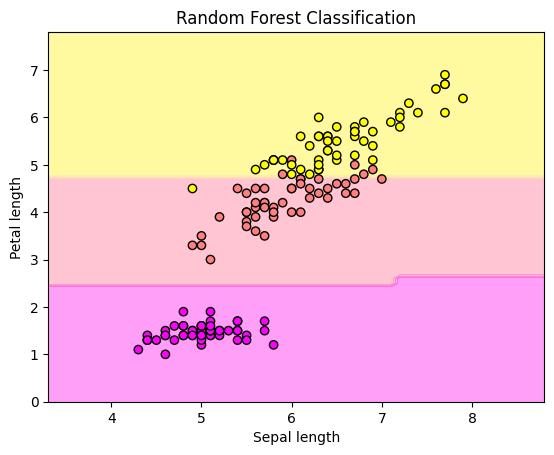

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = np.c_[iris.data[:, 0].reshape(-1, 1), iris.data[:, 2].reshape(-1, 1)]
y = iris.target  # целевые значения классификатора

n_trees = 5 # количество деревьев
n_depth = 3 # глубина

clf = RandomForestClassifier(max_depth = n_depth, n_estimators = n_trees, criterion='gini')
clf.fit(x, y)
yy = clf.predict(x)

# Отображение областей классов
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='spring')
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', cmap='spring')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Random Forest Classification')
plt.show()